## Primera Red Neuronal

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [22]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# [0,0,0,0,1,0,0,0,0,0] ejemplo de una salida de la clase Coat
# [1,0,0,0,0,0,0,0,0,0] ejemplo de una salida de la clase T-shirt/top
# [0.52,0.43,0.67,0.65,0.32,0.28,0.78,0.81,0.45,0.93] ejemplo de una preducción de la NN para la clase Ankle Boot
# [0,0,0,0,0,0,0,0,0,1]


In [24]:
#Ver cuantos datos tenemos cargados
train_images.shape

(60000, 28, 28)

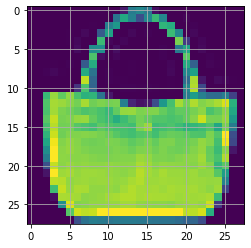

In [25]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [26]:
train_images = train_images / 255.0
test_images = test_images / 255.0

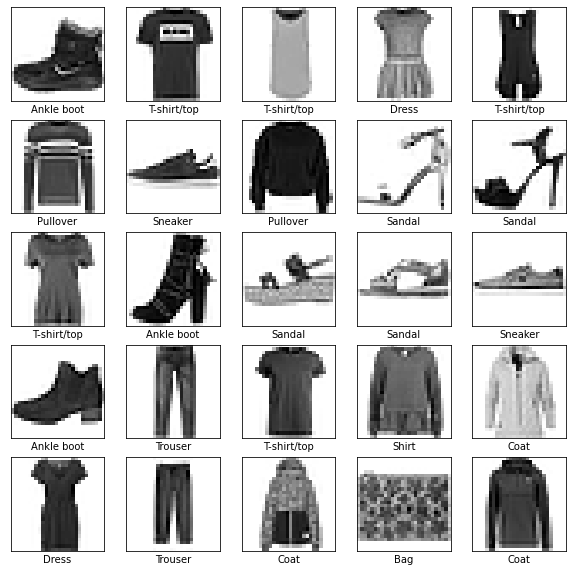

In [27]:
%matplotlib inline
#Dividir en un tamaño predeterminado
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i +1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [28]:
# Primero vamos a definir nuestro modelo
#Cada una de las secuencias serán las capas de la red neuronal
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation = tf.nn.relu),
                          keras.layers.Dense(10, activation = tf.nn.softmax)])

In [29]:
model.compile(optimizer = tf.optimizers.Adam(), loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy']) 
#Le asignamos una metrica en este caso es accuracy 

In [35]:
model.fit(train_images, train_labels, epochs = 5)
#Epochs es el numero de iteraciones que vamos a realizar para hacer el modelo
#En cada una de las iteraciones va modificando su comportamiento de acuerdo a lo aprendido o experimentado
#Aprende a partir del error

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2795 - accuracy: 0.8954
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2658 - accuracy: 0.9009
Epoch 3/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2563 - accuracy: 0.9044
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2480 - accuracy: 0.9078
Epoch 5/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2371 - accuracy: 0.9123


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy', test_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3533 - accuracy: 0.8690
Accuracy 0.869


In [32]:
predictions = model.predict(test_images)

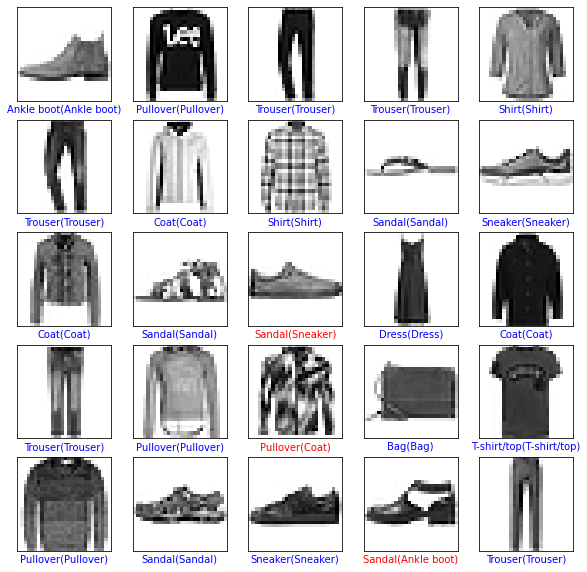

In [34]:
plt.figure(figsize = (10, 10))
for i in range (25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{}({})'.format(class_names[predicted_label], class_names[true_label]), color = color)